# TensorFlow: MNIST CNN Tutorial

https://www.kaggle.com/code/amyjang/tensorflow-mnist-cnn-tutorial

In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(tf.__version__)

2024-10-27 12:34:24.845960: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.16.2


In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

<Axes: ylabel='count'>

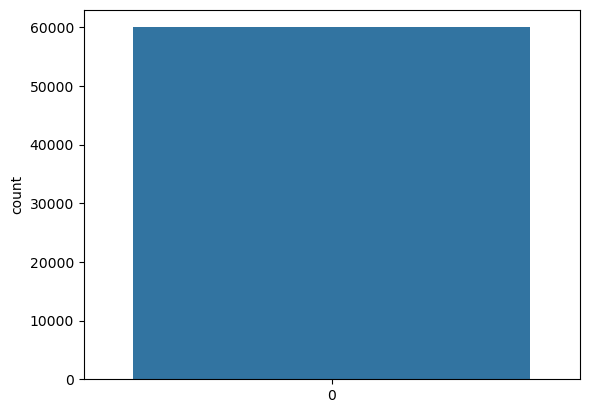

In [3]:
sns.countplot(y_train)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

<Axes: ylabel='count'>

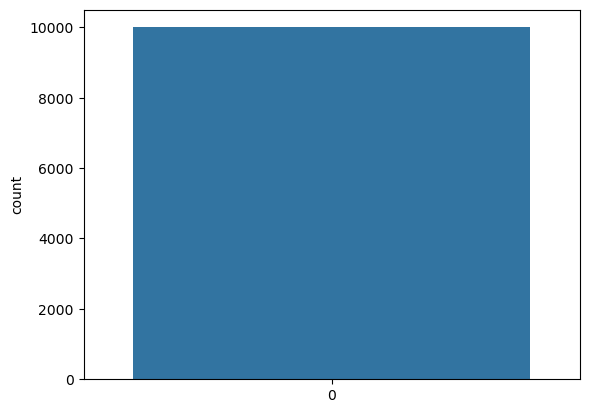

In [5]:
sns.countplot(y_test)

# Check for NaN Values

In [6]:
np.isnan(x_train).any()

False

In [7]:
np.isnan(x_test).any()

False

# Normalization and Reshaping

In [8]:
input_shape = (28, 28, 1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

# Label Encoding

In [10]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

# Visualize Data

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


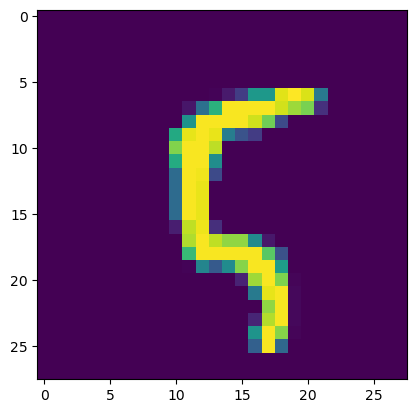

In [11]:
plt.imshow(x_train[100][:, :, 0])
print(y_train[100])

# CNN

In [12]:
batch_size = 64
num_classes = 10
epochs = 5

# Define the Model

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

/Users/andrewy/anaconda3/envs/little_ai_zoo/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Fit the Training Data

In [14]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 285s 336ms/step - acc: 0.8513 - loss: 0.4512 - val_acc: 0.9855 - val_loss: 0.0495
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 265s 314ms/step - acc: 0.9773 - loss: 0.0805 - val_acc: 0.9883 - val_loss: 0.0391
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 190s 225ms/step - acc: 0.9844 - loss: 0.0573 - val_acc: 0.9923 - val_loss: 0.0281
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 219s 245ms/step - acc: 0.9862 - loss: 0.0483 - val_acc: 0.9928 - val_loss: 0.0292
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 286s 339ms/step - acc: 0.9882 - loss: 0.0413 - val_acc: 0.9932 - val_loss: 0.0281


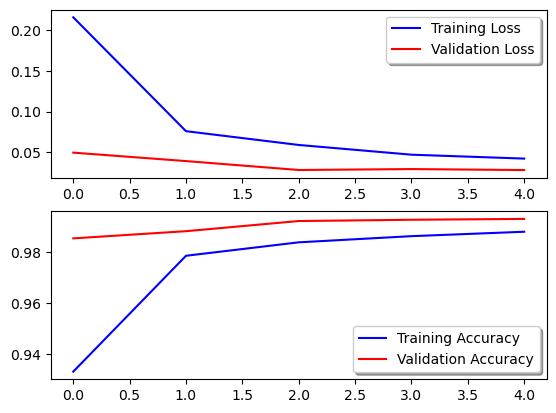

In [15]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)